**Ho Wa Chu**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 3a: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

C:\Users\howac\AppData\Local\Temp\ipykernel_18116\1698172548.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
C:\Users\howac\AppData\Local\Temp\ipykernel_18116\1698172548.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


[[ 9.1850e+00  5.3600e-01]
 [ 2.9323e+01 -3.2090e+00]
 [ 2.6767e+01  2.7510e+00]
 [ 1.7792e+01 -2.8100e+00]
 [ 1.4624e+01  2.4090e+00]
 [ 8.0780e+00  3.6770e+00]
 [ 3.7360e+00 -3.2800e+00]
 [ 1.0999e+01 -2.9970e+00]
 [ 1.8113e+01 -3.0550e+00]
 [ 3.3300e+00 -4.4300e-01]
 [ 7.2690e+00  1.8830e+00]
 [ 1.8756e+01  6.3000e-01]
 [ 1.1630e+00  2.2350e+00]
 [ 2.0432e+01  1.0280e+00]
 [ 1.0113e+01 -1.8040e+00]
 [ 2.5021e+01 -4.3500e-01]
 [ 1.7094e+01 -2.2590e+00]
 [ 1.0920e+01 -6.4340e+00]
 [ 2.9149e+01 -5.7880e+00]
 [ 1.8998e+01 -2.4030e+00]
 [ 4.4840e+00 -2.1450e+00]
 [ 2.0318e+01  4.2410e+00]
 [ 6.5000e-01  5.5100e-01]
 [ 2.5113e+01 -9.1500e-01]
 [ 2.6606e+01  2.4500e+00]
 [ 3.0873e+01 -1.6830e+00]
 [ 1.6120e+00  3.8070e+00]
 [ 2.0943e+01  5.8530e+00]
 [ 2.8132e+01 -4.3900e-01]
 [ 4.3200e+00 -4.7600e+00]
 [ 1.3131e+01  1.5000e+00]
 [ 2.8040e+01  6.9800e-01]
 [ 2.2031e+01  3.0000e-01]
 [ 2.2369e+01 -2.5700e+00]
 [ 1.9957e+01  2.4920e+00]
 [ 4.2290e+00 -2.6080e+00]
 [ 2.0611e+01  3.7880e+00]
 

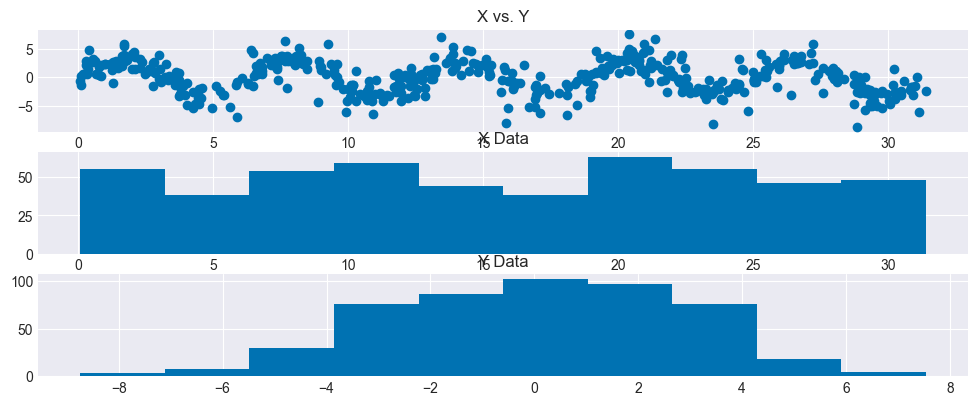

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

arr = np.genfromtxt('data/mystery_data_1.csv', delimiter = ',')
print(arr[2:, :])

plt.subplot(3,1,1)
plt.scatter(arr[2:, 0], arr[2:, 1])
plt.title('X vs. Y')

plt.subplot(3,1,2)
plt.hist(arr[2:, 0], bins = 10)
plt.title('X Data')

plt.subplot(3,1,3)
plt.hist(arr[2:, 1], bins = 10)
plt.title('Y Data')

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residues
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [80]:
import scipy.linalg as sl

print(arr[2:12], 0)

x = arr[2:, 0]
x = np.reshape(x, (500,1))
ones = np.ones([x.shape[0], 1])
x_arr = np.hstack((ones, x))

y_arr = arr[2:, 1]

result = sl.lstsq(x_arr,y_arr)
print(result)

y_sum = np.sum(y_arr)/y.shape[0]
y_sub = y_arr - y_sum
y_square = y_sub**2
smd = np.sum(y_square)

print(1 - (result[1]/smd))

print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]] 0
(array([ 0.92884793, -0.05650709]), 3722.8001542015754, 2, array([404.59762655,  11.16556363]))
0.033824411486558126

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

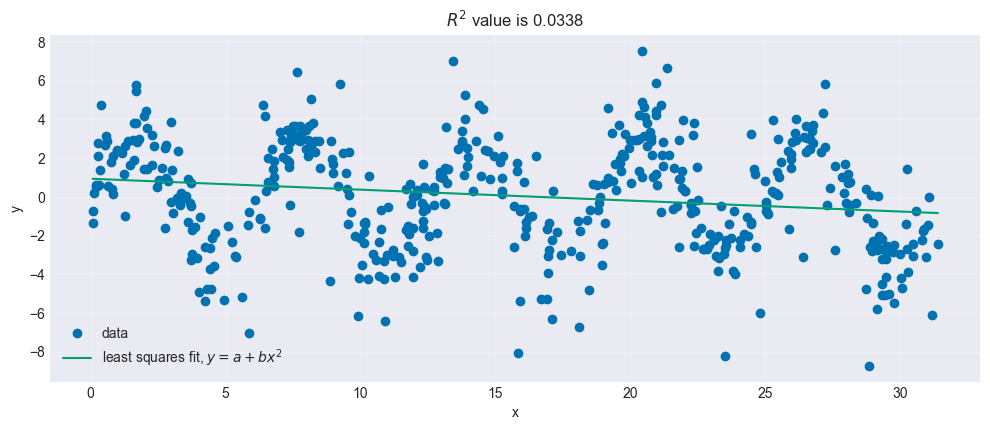

In [86]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(x.min(), x.max(), 100)
yy = xx*result[0][1] + result[0][0]
plt.plot(xx, yy, label='least squares fit, $y = a + bx^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True, fontsize = 10, loc = 'lower left')
plt.title('$R^2$ value is 0.0338')
plt.grid(alpha=0.25)
plt.show()

### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?

The R^2 value compares the linear regression model to the y-mean model. With a low R^2 value, it means the sum of squared error generated by the linear regression model was close to the error created by the y-mean model. This tells us that this is not a good linear regression model because the line of best fit has low confidence in generating new prediction for future data. 